# Non-signal data exercise

In this exercise you take on the role of a senior data analyst correcting mistakes made by a junior analyst. Your consulting company has received the MysteryData data set, and your goal is to build a classifier out of it, and evaluate how well the classifer works. You assigned the job to junior trainee Tux the Linux Penguin (who works for food).

Tux is very excited to work on the data and has produced very promising results. What Tux does not yet know is that MysteryData is actually just random non-signal data where the features x and the class label y are independent of each other - it is not possible to learn anything meaningful from this data. Tux has never taken any of the UTU data analytics courses and has not noticed this. You should help Tux to correct the analyses, so you do not end up reporting incorrect results to your customers.

You will write your answers inside this notebook. If all your answers are correct, your explanations thorough, and you solve the bonus questions, you will get a bonus point. Use written text, code, printouts or visualizations in you answers as needed. Return both this notebook filled (rename it lastname_firstname_studentid.ipynb), as well as a pdf export of the same notebook (same naming, but .pdf instead).

The analysed problem is a binary classification task. We will follow the convention of using +1 to represent the positive class, and -1 the negative. In all but one task we will use area under ROC curve (AUC) to evaluate how well the classifier predicts. For binary classification tasks AUC and c-index are equivalent, 0.5 means random performance and 1.0 perfect predictions. The "true" AUC you would expect to see on a large enough sample of independent test data for any classifier trained on non-signal data is 0.5.

Note that amount of samples, features, and class distribution for MysteryData can differ in different parts of the exercise (these are always written in comments above the code generating the data). Also, in one case there will be a data set on which it is possible to learn better than random classifier.

Some notes on the codes:
- we use predict_proba() instead of predict() when using AUC, because the predicted class probabilities are needed for computing AUC properly (predict() returns only +1/-1 values)
- random seeds are fixed to guarantee that re-running the codes gives same results

In [332]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt


#The data, trust me, you can't learn anything useful from this
def load_mystery_data(samples, features, positives, random_seed):
    #samples: sample size
    #features: number of features
    #positives: number of positive examples, positives <= samples
    #random_seed: initializes the random generator
    assert positives <= samples
    rand_state = np.random.RandomState(random_seed)
    #values in X are from normal distribution, with zero mean, unit variance, zero covariance
    X = rand_state.randn(samples, features)
    #y is a randomly shuffled vector of +1 and -1 values
    y = np.hstack((np.ones(positives), -1.*np.ones(samples-positives)))
    y = rand_state.permutation(y)
    return X, y

# Part 1: some elementary mistakes

## Lesson 1.1: never trust your ----- set performance

The first analysis done by Tux contains an obvious elementary mistake.

In [333]:
#100 samples, 100 features, 50 belong to positive class
X, y = load_mystery_data(100, 100, 50, 2)


#I am going to try knn on my data!!!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


learner = KNeighborsClassifier(n_neighbors=2)
learner.fit(X, y)
#get the estimated probability of belonging to class 1
p = learner.predict_proba(X)[:,1]
auc = roc_auc_score(y, p)
print("I got area under ROC curve %f" % auc)
print('Tux: "I got very high AUC, problem solved!!"')

I got area under ROC curve 0.885600
Tux: "I got very high AUC, problem solved!!"


## Question 1.1
Why can't you trust the AUC result of Tux?

#### Answer:

Since  predictive features 'X' and target class 'y' are completely indepenent, there is no signal or pattern in the data. Thus, the classifer-KNN doesn't learn/extract meaningful from data. The obtained result (AUC) is by chance instead of learning from dataset. Thus, the result cann't trust.

And, the second reason cann't trust this result is that Tux has used the same  data in both testing  and training which gives optimistically bias result even if the data has signal/pattern.

## Lesson 1.2: trivial baselines

The second analysis done by Tux is done a bit better, but analysis of results contains another elementary mistake.

In [334]:
#1000 samples, 100 features, 100 belong to positive class
X, y = load_mystery_data(1000, 100, 100, 1)

#I am going to try knn on my data!!!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#Instead of AUC I will use classification accuracy!
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Now I use a separate test set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
p_test = knn.predict(X_test)

p = knn.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, p)
print('AUC_score:\n',auc)

print('\nConfustion matrix:\n',confusion_matrix(y_test, p_test))
print('\npredicted_class:\n',p_test)

accuracy = accuracy_score(y_test, p_test)
print("Classification accuracy: %f" %accuracy)
print('Tux: "I got 90% classification accuracy, problem solved!!""')

AUC_score:
 0.582389552087

Confustion matrix:
 [[297   0]
 [ 33   0]]

predicted_class:
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -

## Question 1.2
1. Does the high classification accuracy really mean that this is a good predictor?
2. Look at the test set predictions in p_test, what has this classifier actually learned?
3. What would the results look like if you used AUC instead of classification accuracy?

#### Answer:

1.No, the high classification accuracy doesn't really suggest that the model does very well in prediction. For this clarification, in the above code I have printed out  the confusion matrix. From this matrix, one can know that 'knn classifier' classified the both classes(-1 and +1) to '-1' class only and all '33'( +1 class) are mis-classfied.

2.After looking the set predictions in p_test, it is observed that the classifier predicts every sample only to largest class group i.e. '-1'. Thus, the classifier is not extracting/learning any meaningful from the data.

3.AUC score is 0.58 which almost equal to radnom guess prediction. 



# Part 2: introduction to permutation tests

Next, we are using permutation tests to estimate, how likely we are to see AUC values as high as observed, if y is independent of x (non-signal data).

The test is implemented as follows:
- let AUC_original be the AUC obtained in the original analysis
- For 1000 (or preferably more if you have enough CPU time to use) repetitions, shuffle the labels in y, then run the analysis again and compute the AUC value. Store all 1000 AUC values in a list.
- Visualization: visualize the permutation distribution by plotting a histogram of the 1000 AUC values. Does AUC_original look like an outlier, or do you often get as good or better results with permuted class labels?
- p-value: relative fraction of runs, where obtained AUC $\geq$ AUC_original
- example: AUC with original class labeling is 0.6. In 70 runs out of 1000, we obtain as high as or larger AUC. p-value is then $\frac{70}{1000} = 0.07$ 
- result is considered statistically significant, if $p<\alpha$, where $\alpha$ a pre-specified significance level (often $\alpha=0.05$ or $\alpha=0.01$). Statistical significance does not mean that the results are good, only that the classifier has likely learned something from the data. In the following experiments, use $\alpha=0.05$.

## Lesson 2.1: sample size

Tux is now analyzing a small data set with 5-fold cross-validation. 

In [337]:
#20 samples, 10 features, 10 belong to positive class
X, y = load_mystery_data(20, 10, 10, 10)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5)
cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
auc = np.mean(cv_aucs)
print("AUC: %f" %auc)
print('Tux: "I did proper cross-validation and got better than random results. My classifier learned something!!"')

AUC: 0.700000
Tux: "I did proper cross-validation and got better than random results. My classifier learned something!!"


## Question 2.1
Implement a permutation test for the above analysis, are these results statistically significant with $\alpha=0.05$? Provide both visualization of the permutation distribution, as well as the p-value.

Model doesn't learn  from data

p_values is: 0.106
alpbha is: 0.05


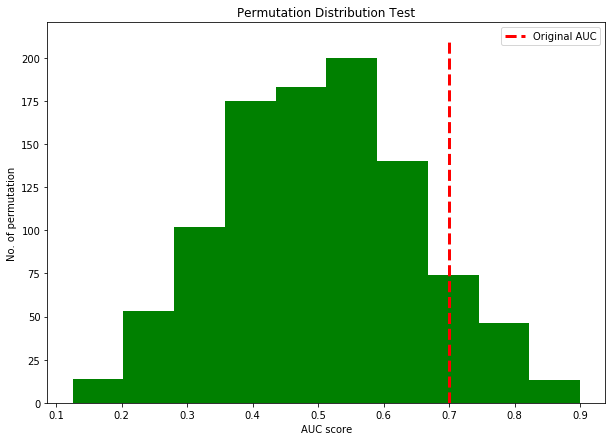

In [476]:
"""This code is just the modification of the previous code"""

#20 samples, 10 features, 10 belong to positive class
X, y = load_mystery_data(20, 10, 10, 10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
cv = StratifiedKFold(n_splits=5)

auc_permu_test =[]  # store AUC of each permutation test
auc_original =  0.700000 # obtained from previous analysis
run_counts = 0 # runs count for p-value
alpha =0.05  # pre-specified significance level

#1000 times repetiation permutation test
for i in range(1000):
    y = np.random.permutation(y)
    cv_aucs = [] # store AUC score for each CV
    for train, test in cv.split(X, y):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc)
        
    
    auc = np.mean(cv_aucs)
    auc_permu_test.append(auc)# append to auc_permu_test
    
    #check current AUC with original AUC
    if auc >= auc_original:
        run_counts +=1


#statistically significant
p_value = run_counts/1000 #calcualte p-value
if p_value < alpha: 
    print('Model learn something from data')
else:
    print('Model doesn\'t learn  from data')
    
    
#print(auc_permu_test)
#print(run_counts)
print('\np_values is:',p_value)
print('alpbha is:', alpha)


'''=== plot permutation histrogram ==='''
#plot figure
axes = plt.figure(figsize=(10,7))
axes = plt.gca() #get the current Axes instance 
plt.hist(auc_permu_test, facecolor='g')
ylim = axes.get_ylim()
plt.plot( [auc_original, auc_original], ylim, '--r', linewidth=3, label='Original AUC')
plt.xlabel('AUC score')
plt.ylabel('No. of permutation')
plt.title('Permutation Distribution Test')
plt.legend()
plt.show()


#### Observation: 
Since the 'p-value' is greater than with the given  'alpha = 0.5', the result is not statistically significant with the given'alpha'.  And,  In the above permutation distribution diagram, the red line denotes the original AUC_score(0.70) and the right part of the redline is the p-values(0.107).

In this case, the 'auc_score' from the random prediction/permutation test is greater than the 'original_auc_score'. Thus, the 'original_auc_score' is considered as the radom prediction by chance rather learning from data.

## Lesson 2.2: sample size again

Let's give poor Tux a better data set that actually has clear difference between the classes and see how things work out. (on this data it is possible to obtain true AUC larger than 0.5)

In [339]:
def load_new_mystery_data(samples, features, positives, random_seed):
    #samples: sample size
    #features: number of positive examples, positives <= samples
    #random_seed: initializes the random generator
    assert positives <= samples
    rand_state = np.random.RandomState(random_seed)
    #values in X are from normal distribution, with zero mean, unit variance, zero covariance
    X_pos = rand_state.randn(positives, features)
    X_neg = rand_state.randn(samples-positives, features)+0.65
    X = np.vstack((X_pos, X_neg))
    #y is a randomly shuffled vector of +1 and -1 values
    y = np.hstack((np.ones(positives), -1.*np.ones(samples-positives)))
    I = rand_state.permutation(samples)
    X = X[I]
    y = y[I]
    return X, y

In [340]:
#20 samples, 10 features, 10 belong to positive class
X, y = load_new_mystery_data(20, 10, 10, 10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5)
cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
cv_auc = np.mean(cv_aucs)
print("AUC: %f" %cv_auc)
print('Tux: "Not sure if I can trust the results anymore, my data set is really small! Please help me compute the p-value!!"')

AUC: 0.875000
Tux: "Not sure if I can trust the results anymore, my data set is really small! Please help me compute the p-value!!"


## Question 2.2
Implement a permutation test for the above analysis, are these results statistically significant with $\alpha=0.05$? Provide both visualization of the permutation distribution, as well as the p-value.



Model likely learn something from data

p_values is: 0.004
alpbha is: 0.05


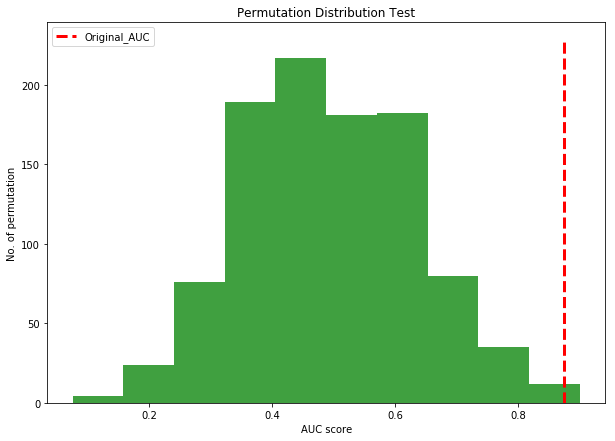

In [477]:
"""This is the modification of Lesson 2.2 code """

#20 samples, 10 features, 10 belong to positive class
X, y = load_new_mystery_data(20, 10, 10, 10)

#shuffle y labels randomly
np.random.seed(1) #fix random seed
np.random.shuffle(y)

auc_permu_test =[]  # store AUC of each permutation test
auc_original =  0.875000 # obtained from previous analysis
run_counts = 0 # runs count for p-value
alpha =0.05  # pre-specified significance level

#1000 times repetiation permutation test
for i in range(1000):
    y = np.random.permutation(y)
    cv_aucs = [] # store AUC score for each CV
    for train, test in cv.split(X, y):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc)
    auc = np.mean(cv_aucs)
    auc_permu_test.append(auc)# append to auc_permu_test
    
    #check current AUC with original AUC
    if auc >= auc_original:
        run_counts +=1


#check statistically significant 
p_value = run_counts/1000 #calcualte p-value
if p_value < alpha: 
    print('Model likely learn something from data')
else:
    print('Model doesn\'t learn  from data')
    
#print(auc_permu_test)
#print(run_counts)
print('\np_values is:',p_value)
print('alpbha is:', alpha)


'''=== plot permutation histrogram ==='''
#create figure
axes = plt.figure(figsize=(10,7))
axes = plt.gca() #get cuurent axes size of figure
plt.hist(auc_permu_test, facecolor='g', alpha=0.75)
ylim = axes.get_ylim()
plt.plot( [auc_original, auc_original], ylim, '--r', linewidth=3, label='Original_AUC')
plt.xlabel('AUC score')
plt.ylabel('No. of permutation')
plt.title('Permutation Distribution Test')
plt.legend()
plt.show()


#### Observation:
After using the new data, the obtained p-value is less than pre-specified significance level($\alpha$). Thus, the result is statistically significant with the given threshold $\alpha$ = 0.05, which means that the classifier has likely learned something from the data. 
The p-values are fraction of runs(permuation test repetation) that are far right from original AUC(red line). Here, the original auc_score looks like an outlier.


# Part 3: mis-using feature selection

Here is a very simple correlation based feature selection method

In [451]:
from scipy.stats import kendalltau

def select(X, Y, scount):
    #select scount features from X with highest correlation with Y
    correlations = []
    for i in range(X.shape[1]):
        corr = kendalltau(X[:,i], Y)[0]
        correlations.append(np.abs(corr))
    correlations = np.array(correlations)
    I = np.argsort(correlations)
    I = I[::-1]
    return X[:,I[:scount]]

In [453]:
#50 samples, 1000 features, 25 belong to positive class
X, y = load_mystery_data(50, 1000, 25, 1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


cv = StratifiedKFold(n_splits=5)
cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
cv_auc = np.mean(cv_aucs)
print('Tux: "My CV-AUC before feature selection is %f"' %cv_auc)


#I'm going to improve my AUC with feature selection!!!
X_fs = select(X, y, 5)
cv_aucs = []
for train, test in cv.split(X_fs, y):
    X_train = X_fs[train]
    y_train = y[train]
    X_test = X_fs[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
cv_auc = np.mean(cv_aucs)
print('Tux: "My CV-AUC after feature selection is %f, it really works!!"' %cv_auc)

Tux: "My CV-AUC before feature selection is 0.496000"
Tux: "My CV-AUC after feature selection is 0.808000, it really works!!"


## Question 3.1

Use permutation test to show Tux that the feature selection based classification approach is actually not learning anything from the data ($\alpha=0.05$, provide both visualization of the permutation distribution, as well as the p-value). Running the test may take a while. Analyse what is going on here, why did the results look so good?

Program running .....
Model doesn't learn  from data
649

p_values is: 0.649
alpbha is: 0.05


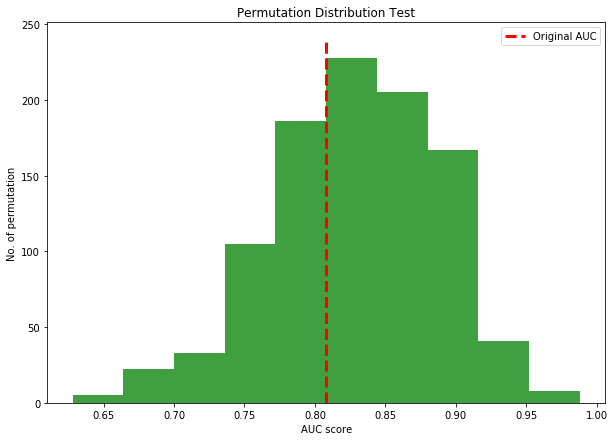

In [475]:
"""Modification of code part-3"""
print('Program running .....')
#50 samples, 1000 features, 25 belong to positive class
X, y = load_mystery_data(50, 1000, 25, 1)

#shuffle y labels randomly
np.random.seed(1) #fix random seed
np.random.shuffle(y)

auc_permu_test =[]  # store AUC of each permutation test
auc_original =  0.808000 # obtained from previous analysis
run_counts = 0 # runs count for p-value
alpha =0.05  # pre-specified significance level


#1000 times repetiation permutation test
for i in range(1000):
    y = np.random.permutation(y)
    
    # X with selected features
    X_fs = select(X, y, 5)

    cv_aucs = [] # store AUC score for each CV
    for train, test in cv.split(X_fs, y):
        X_train = X_fs[train]
        y_train = y[train]
        X_test = X_fs[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc)
    cv_auc = np.mean(cv_aucs)
    auc_permu_test.append(cv_auc)
    
    #check current AUC with original AUC
    if cv_auc >= auc_original:
        run_counts +=1


#check statistically significant 
p_value = run_counts/1000 #calcualte p-value
if p_value < alpha: 
    print('Model likely learn something from data')
else:
    print('Model doesn\'t learn  from data')
    
#print(auc_permu_test)
print(run_counts)
print('\np_values is:',p_value)
print('alpbha is:', alpha)


'''=== plot permutation histrogram ==='''
#create figure
axes = plt.figure(figsize=(10,7))
axes = plt.gca() #get current axes  of figure
plt.hist(auc_permu_test, facecolor='g', alpha=0.75)
ylim = axes.get_ylim()
plt.plot( [auc_original, auc_original], ylim, '--r', linewidth=3, label='Original AUC')
plt.xlabel('AUC score')
plt.ylabel('No. of permutation')
plt.title('Permutation Distribution Test')
plt.legend()
plt.show()


#### Observation: 
Since the feature selection is done  before the cross-validation, the leakage of information  i.e. highly correlated features of test data are also known in before hand. Thus, the result observed from TUX analyis is highly biased. 

Due to wrong way of model selction (outside the CV), the classifier got information about test data, which leads to higher auc_score even in the permutation distribution.

Neverthless, the result got by TUX is somewhere in the middle of premutation distribution(random guess). In other word, the p-value is greater than the given statistically significant  threshold $\alpha$ = 0.05.  Thus, it can be said that the classifier is not learning any thing from data.

## Question 3.2 (bonus exercise)

Correct the bias in above example by combining feature selection properly with cross-validation, run the experiment again. Do also a permutation test for this experiment with as many permutations as you can afford in a reasonable amount of time.

In [472]:
"""This function return the index of selected features"""
def select_index(X, Y, scount):
    #select scount features from X with highest correlation with Y
    correlations = []
    for i in range(X.shape[1]):
        corr = kendalltau(X[:,i], Y)[0]
        correlations.append(np.abs(corr))
    correlations = np.array(correlations)
    I = np.argsort(correlations)
    I = I[::-1]
    return I[:scount]

AUC_score  after feature selection with CV: 0.492


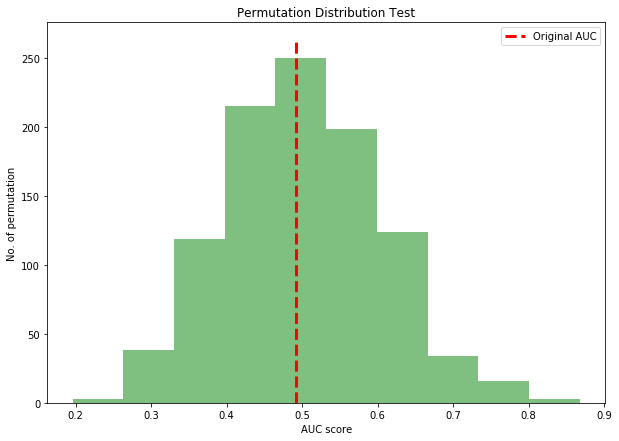

CPU times: user 27min 32s, sys: 5.95 s, total: 27min 38s
Wall time: 6h 10min 33s


In [465]:
"""==== Features selection is done inside the each CV ===="""

%%time
#50 samples, 1000 features, 25 belong to positive class
X, y = load_mystery_data(50, 1000, 25, 1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
cv = StratifiedKFold(n_splits=5)



auc_permu_test =[]  # store AUC of each permutation test
run_counts = 0 # runs count for p-value
alpha =0.05  # pre-specified significance level
cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    
    #column index for selected features
    index = select_index(X_train, y_train , 5) 
    X_train = X_train[:,index] # train data for CV
    X_test = X_test[:,index] # test data for CV
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
cv_auc = np.mean(cv_aucs)
auc_original = cv_auc  # taken as original_auc

print('AUC_score  after feature selection with CV:', auc_original)




'''=== permutaton test start === '''
#shuffle y labels randomly
np.random.seed(1) #fix random seed
np.random.shuffle(y)


auc_permu_test =[]  # store AUC of each permutation test
run_counts = 0 # runs count for p-value
alpha =0.05  # pre-specified significance level


# 1000 repetation 
for i in range(1000):
    y = np.random.permutation(y)
    cv_aucs = []# store each CV auc_score
    for train, test in cv.split(X, y):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
       
        #column index for selected features
        index = select_index(X_train, y_train , 5) 
        X_train = X_train[:,index] # train data for CV
        X_test = X_test[:,index] # test data for CV
    
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc)
    cv_avg = np.mean(cv_aucs)# average cv auc_scores
    auc_permu_test.append(cv_avg) #append average cv auc_scores
    



'''=== plot  permutation distribution ==='''
#create figure
axes = plt.figure(figsize=(10,7))
axes = plt.gca() # get current figure axes size
plt.hist(auc_permu_test, facecolor='g', alpha=0.5)
ylim = axes.get_ylim()
plt.plot( [auc_original, auc_original], ylim, '--r', linewidth=3, label='Original AUC')
plt.xlabel('AUC score')
plt.ylabel('No. of permutation')
plt.title('Permutation Distribution Test')
plt.legend()
plt.show()


#### Observation:
In task, the feature selection is done inside CV (each fold). The obtained 'true auc_score' is 0.492. 
And, the permutation test is also perfomed. The result is illustrated in the above diagram. The 'true auc_score' is almost the center of permutation test, which is true.
    